In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
file_path = r'fdc69852-9edd-445f-9c9a-f516b3ad5e5c.csv'
data = pd.read_csv(file_path, delimiter = ';')

In [4]:
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.000000
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,1.157471
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.000000
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,-6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,162.531250
3996,-1,199800,RAINFOREST_RESIN,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,-180.000000
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,164.593750
3998,-1,199900,KELP,2020,32,NaN,NaN,NaN,NaN,2022,7,2023.0,2.0,2024.0,30.0,2021.0,160.351562


Enter for all graphs or enter numbers seperated by commas (no spaces) for selected products


C:\Users\omara\AppData\Local\Temp\ipykernel_24564\3101343907.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weighted_avg_price_filled = weighted_avg_price.fillna(method="ffill")
C:\Users\omara\AppData\Local\Temp\ipykernel_24564\3101343907.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weighted_avg_price_filled = weighted_avg_price.fillna(method="ffill")


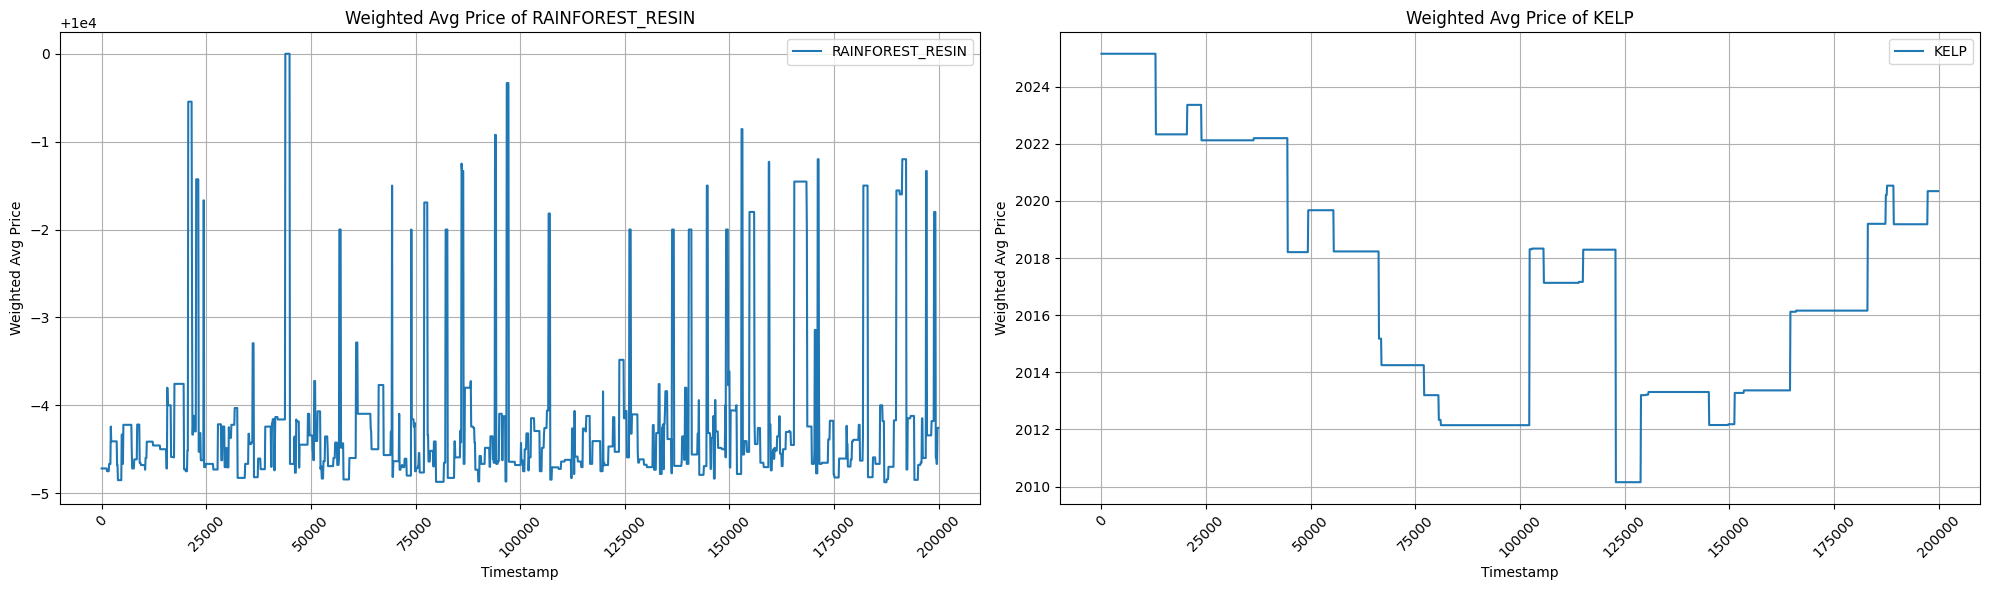

In [5]:
# Column groups
price_columns = ["bid_price_1", "bid_price_2", "bid_price_3"]
volume_columns = ["bid_volume_1", "bid_volume_2", "bid_volume_3"]

# User inputs what product prices to graph
products = data["product"].unique()
products_str = ", ".join(f"{i} = {item}" for i, item in enumerate(products))
print("Enter for all graphs or enter numbers seperated by commas (no spaces) for selected products")
products_id_user_input = str(input(products_str + ":")).split(",")
together_input = str(input("Plot graphs together (Y/N)? ")).upper()

# Convert input to integers (handle empty input)
if products_id_user_input == [""]:  # If user presses Enter without input
    products_user_input = list(products)
else:
    products_id_user_input = [int(i) for i in products_id_user_input]
    products_user_input = [product for i, product in enumerate(products) if i in products_id_user_input]

# Dictionary to store weighted average prices per product
product_weighted_avg_prices = {}

for product in products_user_input:
    product_data = data[data["product"] == product] 

    weighted_price = sum(product_data[price] * product_data[volume] for price, volume in zip(price_columns, volume_columns))
    total_volume = product_data[volume_columns].sum(axis=1)

    weighted_avg_price = weighted_price / total_volume

    # Fill missing values forward (to handle missing timestamps)
    weighted_avg_price_filled = weighted_avg_price.fillna(method="ffill")

    product_weighted_avg_prices[product] = weighted_avg_price_filled

# PLOTTING: Based on User Choice (Y means together, N means seperate)
if together_input == "Y":
    # Plot all products on the same graph
    plt.figure(figsize=(12, 6))
    
    for product, weighted_avg_price in product_weighted_avg_prices.items():
        product_data = data[data["product"] == product]
        plt.plot(product_data["timestamp"], weighted_avg_price, label=product)

    # Formatting
    plt.xlabel("Timestamp")
    plt.ylabel("Weighted Avg Price")
    plt.title("Weighted Avg Price of Selected Products")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    plt.show()

else:
    # Plot each product separately
    num_products = len(product_weighted_avg_prices)
    fig, axes = plt.subplots(1, num_products, figsize=(10 * num_products, 6), sharey=False)  # Separate y-scales

    # If only one product is selected, convert axes to a list for consistency
    if num_products == 1:
        axes = [axes]

    # Loop through each product and create a separate subplot
    for ax, (product, weighted_avg_price) in zip(axes, product_weighted_avg_prices.items()):
        product_data = data[data["product"] == product]
        ax.plot(product_data["timestamp"], weighted_avg_price, label=product)

        # Formatting for each subplot
        ax.set_xlabel("Timestamp")
        ax.set_ylabel("Weighted Avg Price")
        ax.set_title(f"Weighted Avg Price of {product}")
        ax.legend()
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()